# Laboratorio 5 - Autocodificadores 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.legacy import SGD #para uso con procesadores M! y M2

In [2]:
df = pd.read_csv('UK_foods.csv', encoding='UTF-8')
df

,Food,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh_potatoes,720,874,566,1033
7,Fresh_Veg,253,265,171,143
8,Other_Veg,488,570,418,355
9,Processed_potatoes,198,203,220,187


Estadísticas descriptivas

In [3]:
df.describe()

,England,Wales,Scotland,N.Ireland
count,17.000000,17.000000,17.000000,17.000000
mean,469.647059,503.941176,460.235294,429.941176
std,452.701466,463.859282,469.595907,479.896014
min,54.000000,64.000000,53.000000,41.000000
25%,156.000000,175.000000,147.000000,135.000000
50%,253.000000,265.000000,242.000000,209.000000
75%,685.000000,803.000000,566.000000,586.000000
max,1472.000000,1582.000000,1572.000000,1506.000000


Text(0, 0.5, 'Consumption (grams)')

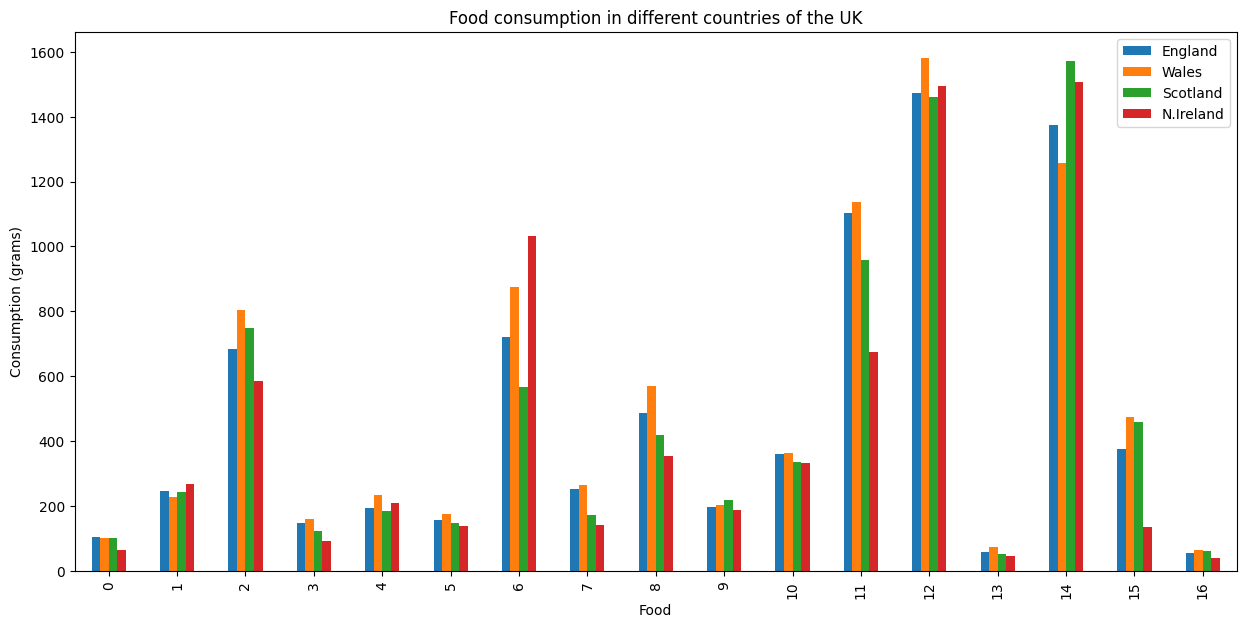

In [4]:
ax = df.plot(kind='bar', figsize=(15,7))
plt.title('Food consumption in different countries of the UK')
plt.xlabel('Food')
plt.ylabel('Consumption (grams)')



In [5]:
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [6]:
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])
norm_arr = scaler.fit_transform(df[df.columns[1:]]).T
df_t_norm = norm_df.T

df_t_norm.columns = df['Food']
df_t_norm


Food,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,0.035966,0.134697,0.444993,0.065585,0.098025,0.071932,0.469676,0.140339,0.306065,0.101551,0.215797,0.739069,1.000000,0.002116,0.930889,0.226375,0.000000
Wales,0.025692,0.107378,0.486825,0.063241,0.112648,0.073123,0.533597,0.132411,0.333333,0.091568,0.198287,0.706851,1.000000,0.005929,0.785244,0.270751,0.000000
Scotland,0.032916,0.124424,0.458855,0.045425,0.086241,0.061883,0.337722,0.077683,0.240290,0.109941,0.186965,0.595128,0.927584,0.000000,1.000000,0.266623,0.005925
N.Ireland,0.017065,0.154266,0.372014,0.035495,0.114676,0.066894,0.677133,0.069625,0.214334,0.099659,0.200000,0.432082,0.991809,0.004096,1.000000,0.064164,0.000000


In [7]:
norm_arr

array([[0.03596615, 0.13469676, 0.44499295, 0.06558533, 0.09802539,
        0.0719323 , 0.4696756 , 0.1403385 , 0.30606488, 0.10155148,
        0.2157969 , 0.73906911, 1.        , 0.00211566, 0.93088858,
        0.22637518, 0.        ],
       [0.0256917 , 0.10737813, 0.48682477, 0.06324111, 0.11264822,
        0.07312253, 0.53359684, 0.13241107, 0.33333333, 0.09156785,
        0.19828722, 0.70685112, 1.        , 0.00592885, 0.78524374,
        0.27075099, 0.        ],
       [0.03291639, 0.12442396, 0.45885451, 0.04542462, 0.08624095,
        0.06188282, 0.33772219, 0.07768269, 0.24028966, 0.10994075,
        0.18696511, 0.59512837, 0.92758394, 0.        , 1.        ,
        0.26662278, 0.00592495],
       [0.01706485, 0.15426621, 0.37201365, 0.03549488, 0.11467577,
        0.0668942 , 0.67713311, 0.06962457, 0.21433447, 0.0996587 ,
        0.2       , 0.43208191, 0.99180887, 0.00409556, 1.        ,
        0.06416382, 0.        ]])

In [10]:
autocodificador = Sequential([
    Dense(units=10, activation='relu', input_shape=(17,)),  # Ajustado a 17 características
    Dense(units=5, activation='relu'),
    Dense(units=2, activation='linear'),  # Capa de cuello de botella
    Dense(units=5, activation='relu'),
    Dense(units=10, activation='relu'),
    Dense(units=17, activation='linear')  # Igual que el número de características de entrada
])

In [11]:
autocodificador.compile(loss="mse", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
autocodificador.fit(norm_arr, norm_arr, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 198ms/step - loss: 0.1698 - accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1654 - accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1642 - accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.0000e+00
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.0000e+00
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1607 - accuracy: 0.0000e+00
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1595 - accuracy: 0.0000e+

In [12]:
codificado_2dim = autocodificador.predict(norm_arr)

1/1 [==============================] - 0s 57ms/step


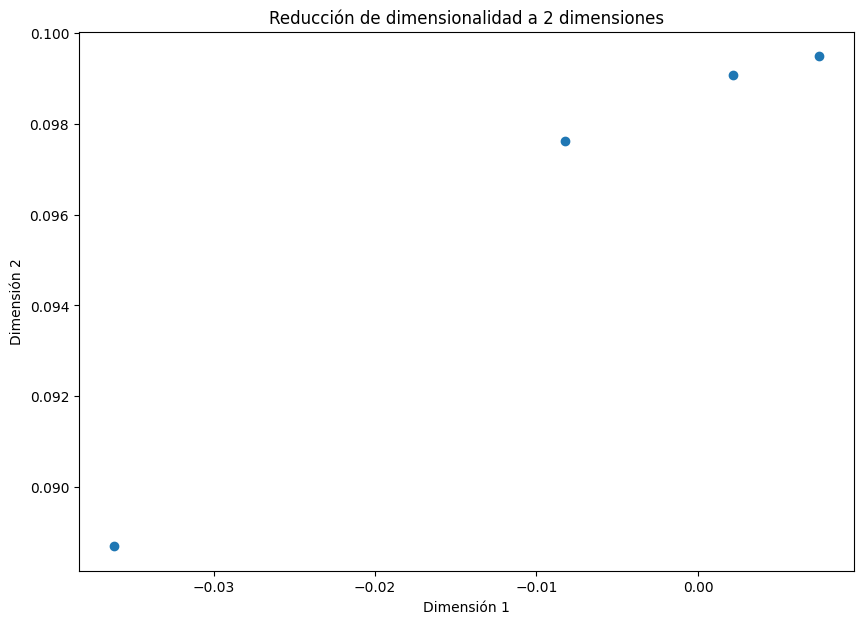

In [13]:
# 3.2 Visualizar las dos dimensiones en un gráfico de dispersión
plt.figure(figsize=(10, 7))
plt.scatter(codificado_2dim[:, 0], codificado_2dim[:, 1])
plt.title('Reducción de dimensionalidad a 2 dimensiones')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()

In [14]:
autocodificador.fit(norm_arr, norm_arr, epochs=50)

# Calcular el MSE
from sklearn.metrics import mean_squared_error
predicciones = autocodificador.predict(norm_arr)
mse = mean_squared_error(norm_arr, predicciones)
print(f'El MSE es: {mse}')

Epoch 1/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0881 - accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0837 - accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0815 - accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0793 - accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0770 - accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.0000e+00
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0726 - accuracy: 0.0000e+00
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.0000e+00
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0681 - accuracy: 0.0000e+00

## Discusión e Insights

### 4.1 ¿Qué podemos aprender sobre los patrones de consumo de alimentos en los cuatro países del Reino Unido?

Dado que la reducción de dimensionalidad resultó en una gráfica de 2 dimensiones con una forma lineal, esto sugiere que las características originales fueron proyectadas en un espacio con una estructura relativamente simple. En este caso, se podría decir que las características de consumo de alimentos en los cuatro países del Reino Unido pueden estar correlacionadas o tener un patrón que se pueda describir de manera relativamente sencilla. Por otra parte, el punto que se encuentra más lejos, se podría tomar que geográficamente no se encuentra muy cerca de los demás países.

### 4.2 ¿El autocodificador hizo un buen trabajo al reducir la dimensionalidad? ¿Qué métricas de rendimiento apoyan su afirmación?

Al evaluar el autoencoder con un MSE se obtuvo 0.007772037524675595 como resultado. Esto se puede tomar como algo positivo, ya que entre más bajo sea este, indica una mejor reconstrucción de los datos. Por otra parte, se pudo observar la similitud de alimentos que se obtuvo mediante cada región.

## Conclusiones

- La representación gráfica de los datos en dos dimensiones sugiere que los patrones de consumo de alimentos en los cuatro países del Reino Unido pueden estar correlacionados o tener una estructura que se pueda describir de manera relativamente simple.
- El autocodificador ha logrado reducir la dimensionalidad de los datos de consumo de alimentos a solo 2 dimensiones.
- El MSE (Mean Squared Error) de 0.0077 indica que el autocodificador ha aprendido una representación que es muy buena para la tarea de reconstrucción. Esto sugiere que ha capturado características importantes de los datos.
- La gráfica de dispersión de 2 dimensiones muestra una distribución aparentemente lineal de los datos. Esto indica que las características originales fueron proyectadas en un espacio con una estructura relativamente simple.